In [167]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib.mlab import bivariate_normal
from scipy import integrate

In [168]:
def survival():
    
    a = np.linspace(-15, 15, 500)
    b = a
    X,Y = np.meshgrid(a, b)
    
    Z_ = (bivariate_normal(X, Y,sigmax=1, sigmay=1.2, mux=0.3, muy=-1.0, sigmaxy=-0.5) +
         bivariate_normal(X, Y,sigmax=1.1, sigmay=1.1, mux=1.0, muy=0.8, sigmaxy=0))
    D_ = -np.log(Z_)
    
    return Z_, D_

In [169]:
def lorentz_deriv(params, t0, sigma=10., beta=5, rho=28.0):
    """Compute the time-derivative of a Lorentz system."""
    x, y, z = params
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

(-50, 50)

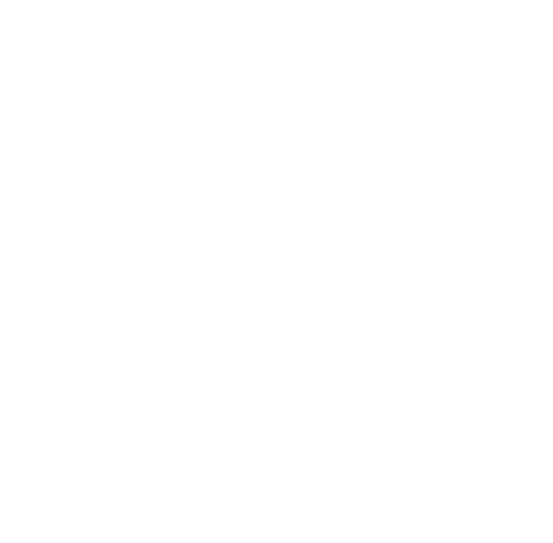

In [180]:
N_trajectories = 20

# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))

# Solve for the trajectories
t = np.linspace(0, 4, 5000)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t)
                  for x0i in x0])

# Get survival landscape
D_ = survival()[1]

# Set up figure & 3D axis for animation
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

# choose a different color for each trajectory
colors = plt.cm.gray(np.linspace(0, 1, N_trajectories))

# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c)
           for c in colors], [])

# Make drive space
#cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False)
#sns.heatmap(D_, cmap=cmap, annot=False, cbar = False)

# prepare the axes limits
ax.set_xlim((-50, 50))
ax.set_ylim((-50, 50))

In [181]:
# initialization function: plot the background of each frame
def init():
    
    for line, pt in zip(lines, pts):
        line.set_data([], [])

        pt.set_data([], [])
        
    return lines + pts

In [182]:
# animation function. This is called sequentially
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        
        x, y, z = xi[:i].T
        
        line.set_data(x, y)
        
        pt.set_data(x[-1:], y[-1:])

    fig.canvas.draw()
    return lines + pts

In [183]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1500, interval=30, blit=True)
rc('animation', html='html5')

In [184]:
HTML(anim.to_html5_video())